## Heatmap with Python

This heatmap is using the data of my GitHub profile to show my contribution on 2022.


I create my own dataset manually from my GitHub data.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

data = pd.read_csv('github.csv', parse_dates=['date_time'])
data.head()

,date_time,contribution
0,2022-01-01 18:00:00,0
1,2022-01-02 18:00:00,0
2,2022-01-03 18:00:00,0
3,2022-01-04 18:00:00,0
4,2022-01-05 18:00:00,0


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

data['year'] = data.date_time.dt.year
data['month'] = data.date_time.dt.month
data['Weekday'] = data.date_time.dt.day_name()

In [3]:
data_2022 = data[data['year'] == 2022]
github_2022 = data_2022[['month', 'Weekday', 'contribution']]
pivoted_data = pd.pivot_table(github_2022, values='contribution', index=['Weekday'], columns=['month'], aggfunc = np.mean)

<AxesSubplot:xlabel='month', ylabel='Weekday'>

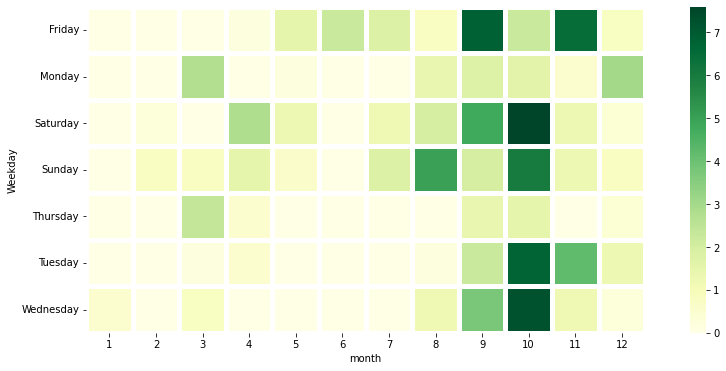

In [4]:
plt.figure(figsize = (16,6))
sns.heatmap(pivoted_data, linewidth = 5, cmap='YlGn', linecolor='white', square = True)

<AxesSubplot:title={'center':"Julia's Github contribution in 2022"}>

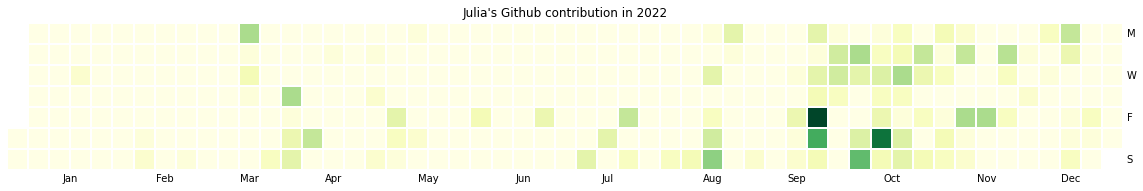

In [5]:
#pip install calmap
import calmap

data = data.set_index('date_time')
fig = plt.figure(figsize=(20,10))
plt.title("Julia's Github contribution in 2022")
plt.xlabel('xlabel')
plt.ylabel('ylabel')
calmap.yearplot(data['contribution'], cmap='YlGn', fillcolor='lightgrey', daylabels = 'MTWTFSS', dayticks=[0, 2, 4, 6], linewidth = 2)

In [6]:
fig.savefig('heatmap.png')
plt.show()